# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [26]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [27]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [28]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [305,125,202]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,243,12939,8852,799,3909,211
1,76237,3473,7102,16538,778,918
2,25203,11487,9490,5065,284,6854


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**


Customer No 305 is characterized by relatively large milk and det/paper purchases, moderate grocery spending and little to no spending on frozen and deli goods. This is interesting because both its largest and smallest spending occurs on perishable goods. Major difference between milk and the other perishable fields are that 1. it's relatively homogeneous and 2. it's relatively low maintenance (as opposed to fresh produce that requires cleaning and deli goods which often require individual handling). Given the strange combination of of focuses of the purchaser, I would guess that it is a convenience store. Convenience stores, at least in Australia tend to only have grocery products, non-edible products (in this case detergents/paper factor) and drinks, avoiding things such as fresh produce, deli products and frozen goods presumably due to the mess, extra labor, and cost of running a freezer respectively. In my experience, such stores tend to sell alot of the perishables (milk) that they do hold due to their convenience factor (close proximity, longer hours etc). 


Customer No 125 is characterized by large fresh and frozen food purchases and moderate purchases for all other categories. This leads me to believe it is either some sort of market-style vendor with a focus on fresh produce (and frozen seafood) or possibly a seafood restaurant. Although not all frozen food is seafood, the combination with strong fresh food purchases leads me to believe that they might be making use of fresh frozen goods. 

Customer No 3 tends to purchase moderately across the board apart from the detergents/paper category. This could be indicative of a cafe or restaurant, as they would have demand for all categories of products with less emphasis on detergents/paper as it is a secondary consumption in their line of business. Due to the relatively moderate spending on milk relative to the other categories, I would lean towards restaurant as I would expect this to be a larger component of a cafe's purchases.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

Rather than do this for one category of product I've decided to do it for all product categories because I think its an interesting question. It brings back memories of linear algebra and questions of independence.

In [29]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
drop_fresh = data.drop('Fresh', axis = 1)
drop_milk = data.drop('Milk', axis = 1)
drop_grocery = data.drop('Grocery', axis = 1)
drop_frozen = data.drop('Frozen', axis = 1)
drop_det = data.drop('Detergents_Paper', axis = 1)
drop_deli = data.drop('Delicatessen', axis = 1)

from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split

In [30]:
# Fresh

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(drop_fresh, data['Fresh'], random_state=3)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=3)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
print(regressor.score(X_test, y_test))

-0.821220389834


In [31]:
# Milk

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(drop_milk, data['Milk'], random_state=3)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=3)
regressor.fit(X_train, y_train)
# TODO: Report the score of the prediction using the testing set
print(regressor.score(X_test, y_test))

0.395040035446


In [32]:
# Grocery

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(drop_grocery, data['Grocery'], random_state=3)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=3)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
print(regressor.score(X_test, y_test))

0.700062558033


In [33]:
# Frozen

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(drop_frozen, data['Frozen'], random_state=3)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=3)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
print(regressor.score(X_test, y_test))

-5.74293504155


In [34]:
# Detergents_Paper

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(drop_det, data['Detergents_Paper'], random_state=3)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=3)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
print(regressor.score(X_test, y_test))

0.563935330016


In [35]:
# Delicatessen

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(drop_deli, data['Delicatessen'], random_state=3)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=3)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
print(regressor.score(X_test, y_test))

-0.531183723252


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

According to the R2's returned for each of the features, Fresh, Frozen and Delicatessen are critical features that can't be explained by spending on other features. Each has a negative R2 score which means that the model performed worse than simply predicting the mean for the test sets on the respective features. In particular frozen seemed particularly hard to predict with a very large negative R2 score. Both detergents_paper and milk could be partially explained by the remaining features, however not by enough to justify removing these features. Grocery was the only borderline case with 70% of variation in the test set explained by the model. I personally would still keep this feature as there is still quite a bit of unexplained variance and its not as if we have a prohibiting amount of data. 

The result of this analysis is that there is no feature that is sufficiently explained by the others so as to justify removing it from the data set. Since all features contain some unique information it is possible that all will be useful for identifying customer segments. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

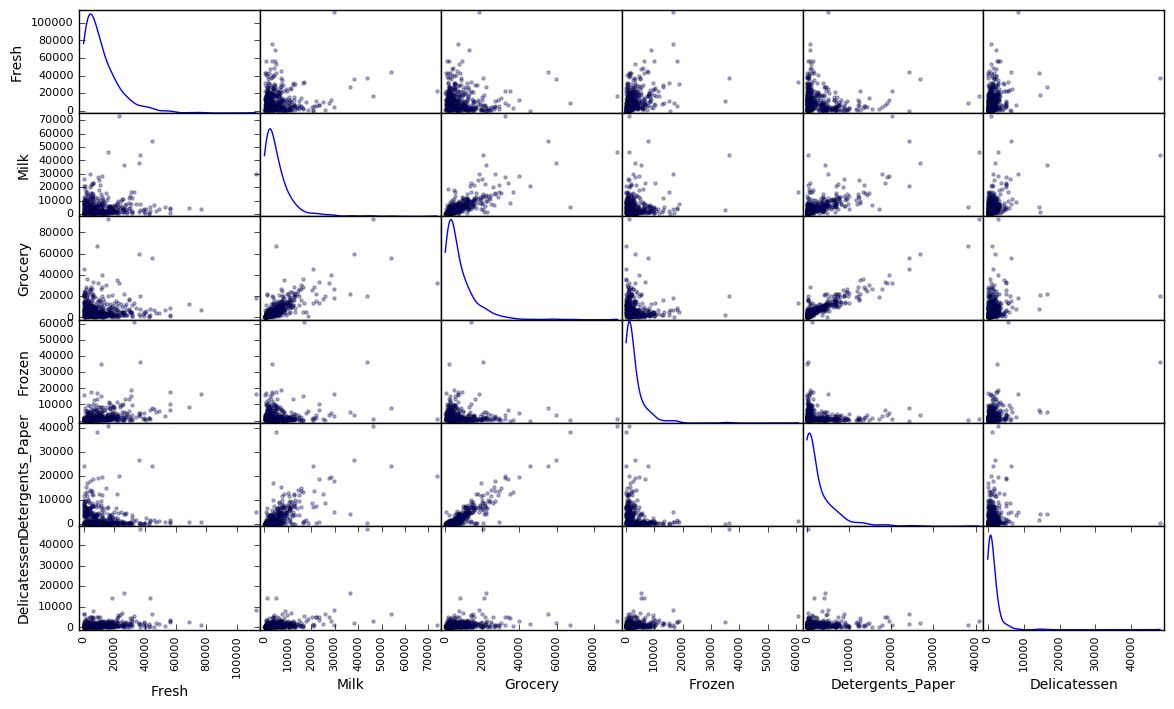

In [36]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

The only pairs of features that show any correlation of note are Milk, Grocery and Detergents_Paper with each other, with both Milk and Detergents_Paper being more strongly correlated with Grocery than each other. This explains the high R2 score for Grocery and also the positive R2 scores for Milk and Detergents_Paper. The data for the features concerned all tend to have a positive correlation and positively skewed distributions. Most observations tend to have small values with a few having much larger values (outliers).

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

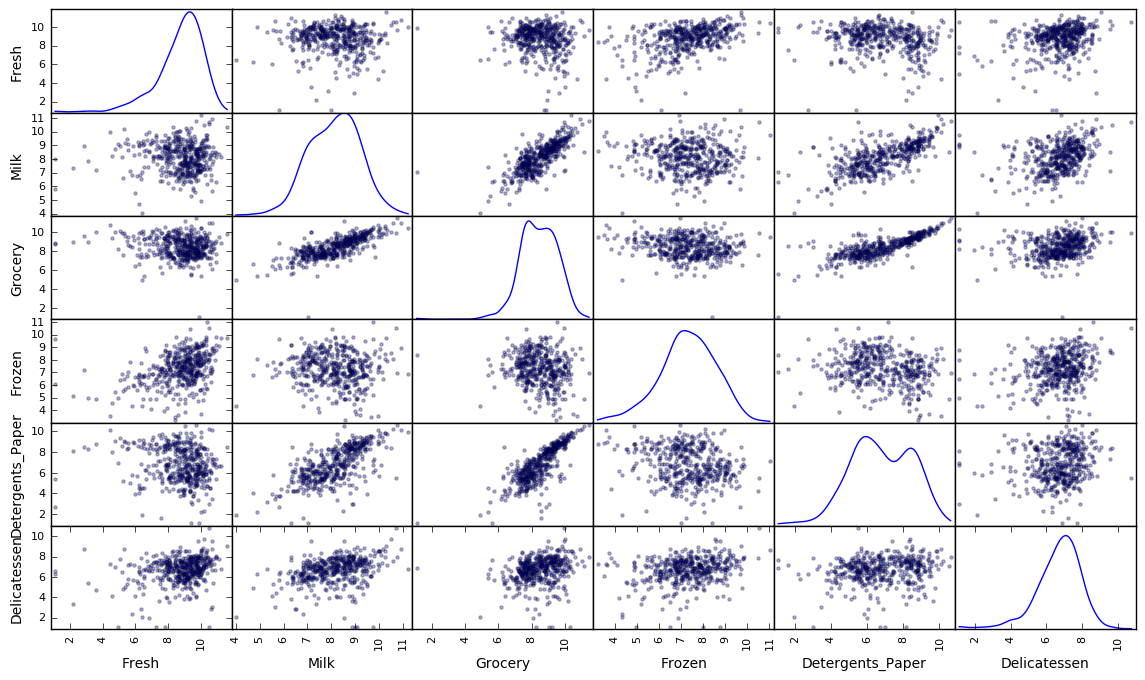

In [37]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [38]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5.493061,9.468001,9.088399,6.683361,8.271037,5.351858
1,11.241602,8.152774,8.868132,9.713416,6.656727,6.822197
2,10.134718,9.348971,9.157994,8.530109,5.648974,8.832588


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [39]:
# Keep track of outliers
outlier_record = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.0)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.0)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # Record index of outlier
    for i, e in enumerate(log_data[feature]):
        if e < Q1 - step or e > Q3 + step:
            outlier_record.append(i)

# Count outliers per index
from collections import Counter
c = Counter(outlier_record)
print(c)

#OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65, 66, 75, 95, 109, 128, 142, 154, 187, 218, 338]

print(outliers)
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Counter({154: 3, 128: 2, 65: 2, 66: 2, 75: 2, 193: 1, 264: 1, 137: 1, 142: 1, 145: 1, 412: 1, 285: 1, 161: 1, 420: 1, 38: 1, 171: 1, 429: 1, 175: 1, 304: 1, 305: 1, 439: 1, 184: 1, 57: 1, 187: 1, 203: 1, 325: 1, 289: 1, 81: 1, 338: 1, 86: 1, 343: 1, 218: 1, 95: 1, 96: 1, 353: 1, 98: 1, 355: 1, 356: 1, 357: 1, 233: 1, 109: 1, 183: 1})
[65, 66, 75, 95, 109, 128, 142, 154, 187, 218, 338]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

As you can see from the printout of the counter object, there are 5 data points that are outliers in more than one feature. Data point 154 is the only point to record 3 or more outlier features. I'm choosing to remove these data points as they represent extreme values in regards to more than one feature and because there is only 5 in total. Ordinarily, the removal of 5 observations from a total of 420 shouldn't bias the results of this type of analysis. In the case of outliers it may well bias the results which is exactly why we are removing them. 

On top of the 5 mentioned above, I've decided to remove a few more observations that were flagged when increasing the step size to that of 3 times the interquartile range. Observations that fall outsize of 3 x IQR are deemed 'far out' by Turkey and can be interpreted as a kind of extreme outlier (if such a thing is possible). The following observations were flagged by the increased step size:
128, 66, 75, 109, 142, 338, 218, 187, 95
All of the above were added to the 'outliers' list due to their extreme nature. Of these, three were already accounted for as having more than one outlier feature which further justifies my decision in removing them. In total, 11 points were removed. None of those removed were part of the sample.

From a practical point of view, I also believe that its prudent to remove these customers from our analysis. Not only may their inclusion skew the results of our analysis for the remaining customers, it makes sense to separate and pay special attention to these customers as they are either extremely large or extremely small purchasers. Taking an individual approach to these customers may prove profitable to the business either by reducing costs or increasing sales. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

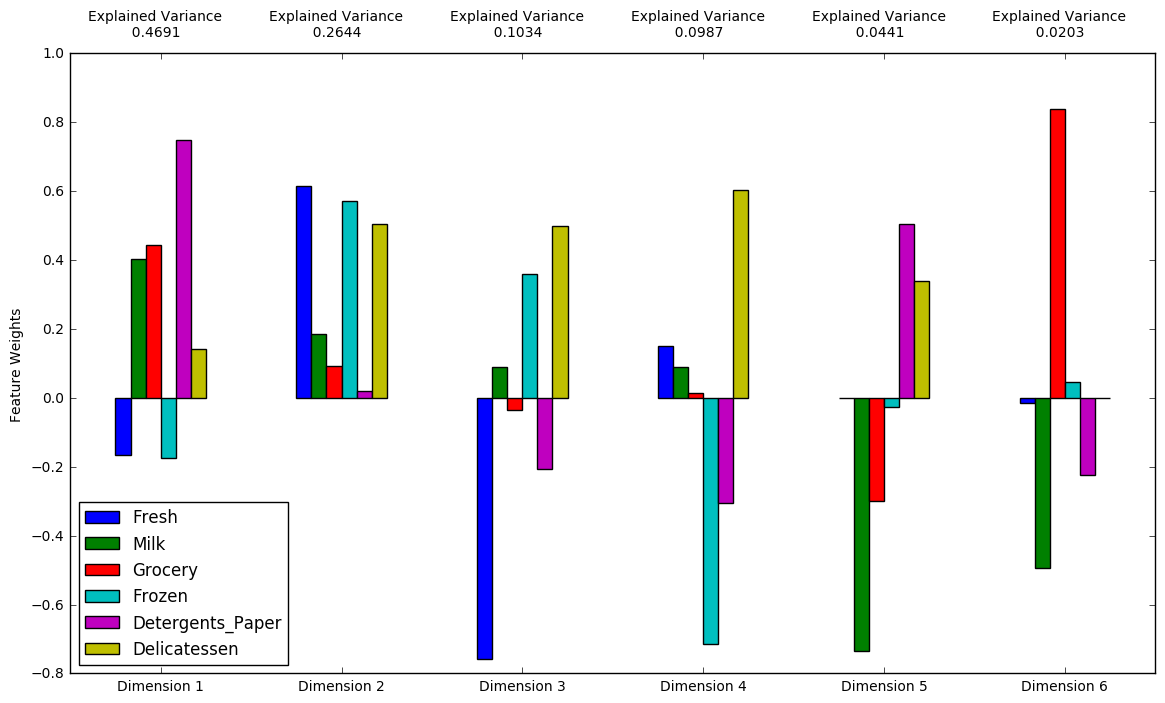

In [40]:
# Importing PCA object
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

73.35% of variance is explained by the first two principle components. 93.56% of variation is explained by the first four principle components. 

The first dimension has strong positive weights for milk, grocery and detergents_paper. An increase in this dimension leads to an increase in milk, grocery and detergents_paper spending and a decrease in spending on fresh and frozen. This dimension probably represents some sort of non-perishable/low maintenance goods factor maybe associated with convenience stores etc. 

The second dimension has strong weights for fresh, frozen and deli. An increase in dimension 2 leads to a increase in fresh, frozen and deli spending. This dimension possibly represents a fresh food/higher maintenance feature possibly related to restaurants and or market vendors.

The third dimension strongly negatively weights fresh and strongly positively weights frozen and deli. An increase in this feature represents a increase in spending on frozen and deli and a reduction in spending on fresh and detergents_paper. This dimension seems to separate itself from the second by its large negative weighting of fresh. Perhaps it represents purchases of fish and meats. Maybe associated with butchers and fresh/preserved meat vendors?

The forth dimension strongly weights deli and strongly negatively weights frozen and detergents_paper. An increase in this feature leads to a decrease in spending on frozen and detergents_paper and an increase in spending on deli. Similarly to how dimension 2 seems to distinguish itself from dimension 3, dimension 4 seems to do the same to dimension 3 by strongly negatively weighting frozen. This feature seems to represent purchasing on pure deli. Maybe its associated with pure deli vendors?

The dimensions become increasingly hard to interpret and explain a decreasing amount of variance, as is well documented with PCA.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [41]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.3855,-2.7624,1.4018,-1.1933,-0.8912,-0.4355
1,-0.7284,2.9428,-0.9098,-1.2369,-0.2581,0.4481
2,-0.1951,2.8303,0.8089,1.0736,-1.0211,0.2858


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [42]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [43]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.3855,-2.7624
1,-0.7284,2.9428
2,-0.1951,2.8303


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

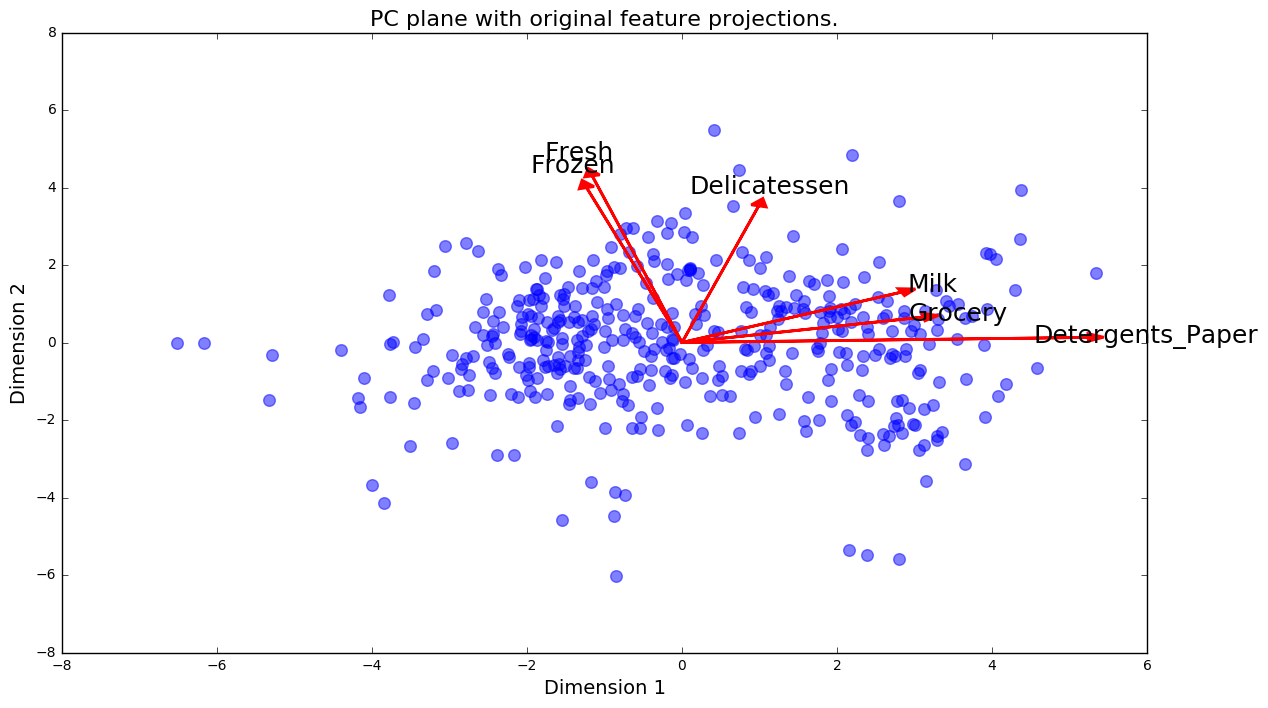

In [44]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

Advantages to using K-means over Gaussian clustering include it's simplicity (both in implementation and explanation), speed and forced clustering (every data point is clustered into a distinct group). Advantages for using a Gaussian model over k-means include the ability to soft cluster (observations can belong to more than one cluster). 

For the purposes of this analysis, I have decided to go with K-means clustering. I chose K-means over Gaussian clustering for a number of reasons. Firstly, speed. Speed is important because we are not sure how many customer classes we are dealing with so we will need to run the algorithm for multiple values of k. Although with 440 observations it will barely make a difference, in practice with a much larger dataset I imagine the run time of Gaussian Mixture clustering to be much higher than that of K-means. Secondly, understandability. K-means is a lot easier to understand and explain to a group of executives than Gaussian Mixture Method. Thirdly, soft clustering doesn't add much value in this context. Do we really want to know that customer XYZ has a 2% probability of falling in cluster 3? We want hard clusters for actionable results. Removing some of the extreme customers in step 4 should help with cluster cohesion and these extreme customers can be dealt with on a case by case basis. All considered I think K-means is a perfectly acceptable choice for this use case.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

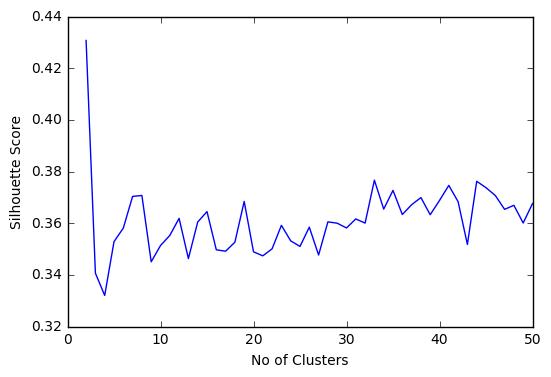

In [45]:
# Import clustering algorithm and silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Record silhouette scores
silhouettes = []

for i in range(2,51):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=i).fit(reduced_data)
    
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    silhouettes.append(score)

# Plot silhouette scores
import matplotlib.pyplot as plt
plt.plot(range(2,51), np.array(silhouettes))
plt.xlabel('No of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

As you can see in the above plot, n_clusters equal to about 43 produces the best silhouette score of about 0.38. What's concerning about this is the jagged nature of the silhouette score as we increase n_clusters. I however, have chosen to go with n_features = 7 which has a slightly worse silhouette score but likely avoids overfitting our data and overcomplicating our analysis and results.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

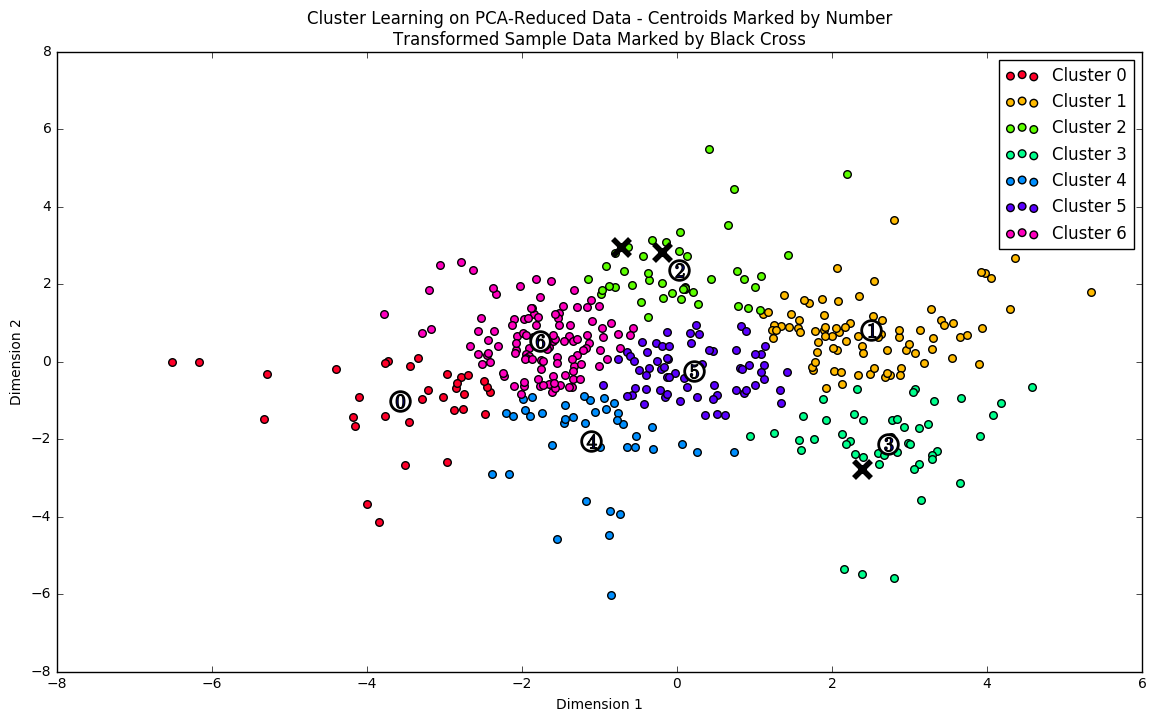

In [61]:
# Recreate clustering algorithm with optimal number of clusters
clusterer = KMeans(n_clusters=7).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [58]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,12540.0,1827.0,2240.0,2789.0,245.0,853.0
Segment 1,7313.0,10762.0,15296.0,1538.0,6000.0,1785.0
Segment 2,2290.0,1469.0,2346.0,566.0,380.0,253.0
Segment 3,6521.0,660.0,867.0,1581.0,62.0,302.0
Segment 4,1173.0,6842.0,12828.0,280.0,6696.0,423.0
Segment 5,5632.0,3527.0,5028.0,1269.0,1066.0,766.0
Segment 6,28808.0,5299.0,5901.0,5806.0,971.0,2770.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Customers assigned to cluster 0 seems to represent small purchasers across the board, with a slight bias towards fresh and frozen food. This segments may represent small time green grocers, fish/seafood stalls and collective small scale vendors. 

Customers in cluster 1 are very similar to those in cluster 3 with above average milk, grocery and detergents_paper spending. The main difference is that they also purchase more from fresh, frozen and deli categories. Customers from this cluster may include general stores and supermarkets.

Customers from cluster 2 tend to purchase more fresh, frozen and deli products than the average. Customers in this cluster may be restaurants, hotels, market stalls and other edible goods retailers.

Customers from cluster 3 tend to have above average purchasing when it comes to milk, grocery and detergents_paper but below average purchasing for fresh, frozen and deli. Cluster 3 sits below cluster 1 on the right side of the distribution. Customers in this segment may be convenience stores. Perhaps clusters 1 and 3 could be merged?

Cluster 4 is very similar to cluster 0 and represent smaller purchasers across the board. The main difference with those in cluster 4 is that they tend to purchase more milk, grocery and detergents_paper as opposed to cluster 0's fresh, frozen and deli. Perhaps clusters 0 and 4 could be merged?

Customers assigned to cluster 5 seems to represent the average customer overall with moderate purchases in all categories. Cluster 5 sits at the center of the overall distribution of customers on the principle component graph and doesn't lean heavily towards any of the original features. When compared to the original statistics of the entire dataset, segment 5 records around half the average purchase amount for each feature which leads me to say that this segment represents the median customer. Perhaps this feature represents small supermarkets or convenience stores. 

Customers in cluster 6 have above average fresh and frozen purchasing amounts. Their location on the principle component graph places them most in the direction of the original fresh and frozen features. Customers in this segment may represent fresh food and market vendors and also restaurants since they would tend to purchase fresh supplies (i hope).

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [62]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 3
Sample point 1 predicted to be in Cluster 2
Sample point 2 predicted to be in Cluster 2


**Answer:**

The prediction for point 0 is accurate as the features that describe it are large values for milk, grocery and detergents_paper and very small values for fresh, frozen and deli. This would place it in the territory of cluster 3.

Both sample point 1 and 2 are predicted to fall into cluster 2. For point 1 I would agree with this as the features that characterize it are large fresh and frozen features. For point 2 who's defining feature is high spending on deli, cluster 2 seems most appropriate. Point 2 also has high purchases in fresh and frozen which further confirm its placement.

Overall the predictions seem to be accurate and intuitive. Exactly what you want from a clustering algorithm!

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

The whole point of customer segmentation is to group similar customers together. It is reasonable to assume that different groups of customers will act differently on average to a change in delivery service due differences between their needs. The client could use customer segmentation to group alike customers, then conduct A/B testing on samples from the various groups to infer which groups may react positively to a change in delivery time. A/B testing could be used to measure and compare customer satisfaction of a sample of customers (treatment group) from each cluster that are subject to the change in delivery times with those of the customers not subject to the change in delivery times (control group). Performing clustering before conducting tests will allow the client to be more precise when targeting customers for the new delivery schedules whilst still allowing for efficient testing.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

I can see two simple techniques for dealing with this issue. Firstly if the wholesaler still has access to the clustering model, it could simply pass in the new data and have the model predict the appropriate clusters. Secondly, the wholesaler could train a supervised learning algorithm using the original customer data using the clusters as labels, then use this model to classify the new customers based on predicted product spending.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

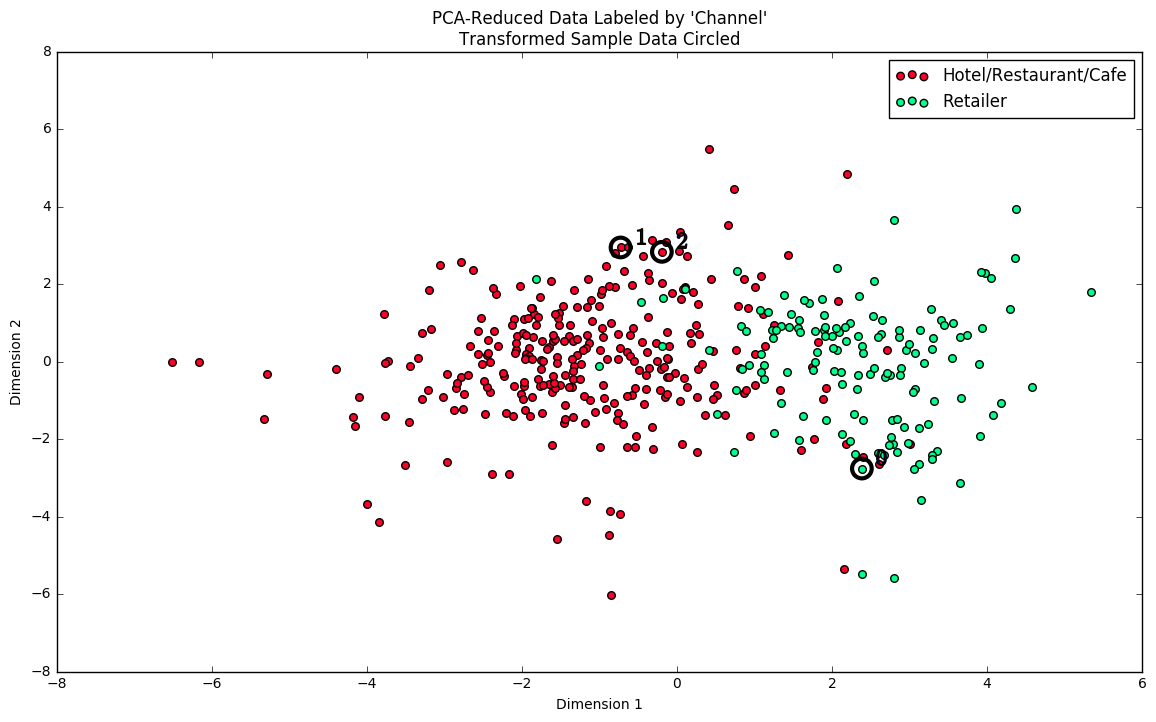

In [63]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

To be honest, my clustering does quite a poor job of describing this underlying phenomenon. It uses way too many clusters and doesn't tend to divide the data along the same boundary as above. There are definitely some clusters from my analysis that could be classed as completely hotel/restaurant/cafe or retail and even some that encompassed equal amounts of both the above categories. When reviewing the results of my clustering above, I thought that there were two groups of two clusters that probably could have been merged given their dimensions after PCA but even then I would have had more clusters than above. One thing to note however is that the although the data is split nicely according to dimension 1, both categories have a range of values for dimension 2. From the above PCA breakdown we know that dimension two strongly weights fresh, frozen and deli features, features that I would argue have an important bearing on the delivery issue at hand. Although this new feature helps shed some light on the reasoning of the first principle component, I would doubt that it is the be all and end all for explaining customers delivery preferences and would be skeptical about using the above clustering for this purpose.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.